In [1]:
#Salary Prediction 
#Predict depenedant varaibale (Salary)  with independant variable YearExperience 

In [2]:
#import required libraryies 
import pandas as pd

import numpy as np

#read data 
df = pd.read_csv('Salary_Data.csv')
df.head(30)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
#check number of rows and coloumns in data
df.shape

(30, 2)

In [4]:
#check statstical data 
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
#check for null records 
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

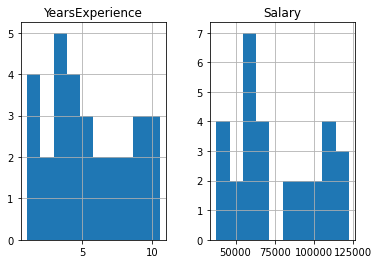

In [6]:
# EDA single variant analysis ; to check skewness of data 
df.hist()

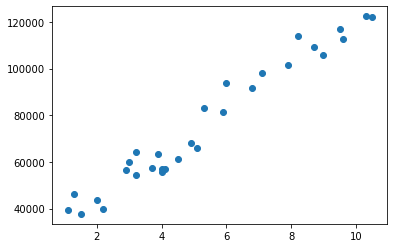

In [7]:
#check the linearlity with independant and depenedant varaibale 
# EDA Bi variant analysis   # positively corelated 
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'],df['Salary'])
plt.show()

In [8]:
# check correlation between varibales  ; shows strong corelation 
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
# Divide it into input and output
#x = df.iloc[:,[0]].values
#y = df.iloc[:,1].values

x=df.drop('Salary',axis=1).values
y=df['Salary'].values 
# x (input) should  be in 2 dimension


In [10]:
x.shape

(30, 1)

In [11]:
y.shape

(30,)

In [12]:
x.ndim
# ValueError: Expected 2D array, got 1D array instead:

2

In [13]:
# Linear regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#1. Fitting the model : Mapping input with output
#2. Predict the values
model.fit(x,y) # training your model
y_pred = model.predict(x) # Testing your model
y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [14]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [15]:
# Check the value of SLope and Intercept
# Check the value of SLope
model.coef_

array([9449.96232146])

In [16]:
#  Check the value of   Intercept
model.intercept_

25792.20019866871

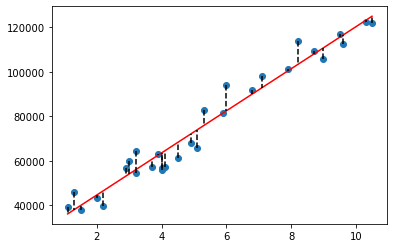

In [17]:
# Best Fit Line
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(x,y_pred,c='r')
for i in range(len(x)):
  plt.plot([x[i],x[i]],[y[i],y_pred[i]],c='k',linestyle='--') 
plt.show()
plt.show()

In [18]:
model.predict([[3.5]])
# Testing new value

array([58867.06832376])

In [19]:
9449.96232146*3.5+25792.200198668696

58867.068323778694

In [20]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_pred,y,squared=False))
print(r2_score(y_pred,y))

5592.043608760662
0.9550206007551909


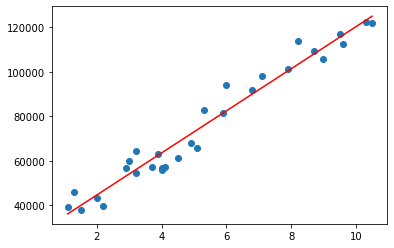

In [21]:
#show the result 
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(x,y_pred,c='r')
plt.show()

In [22]:
#Conclution 
print(model.coef_)

[9449.96232146]


In [ ]:
 # a 1 unit increase in Experience  is associated with an increase of 9449.96232146 Salary

In [23]:
#Linear model fitted by minimizing a regularized empirical loss with SGD.
#SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).
#The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

from sklearn.linear_model import SGDRegressor
model = SGDRegressor(random_state=42,penalty=None)
#1. Fitting the model : Mapping input with output
#2. Predict the values
model.fit(x,y) # training your model
y_pred = model.predict(x) # Testing your model
y_pred

array([ 29982.92317941,  32077.49174493,  34172.06031045,  39408.48172426,
        41503.05028978,  48834.04026911,  49881.32455187,  51975.8931174 ,
        51975.8931174 ,  57212.3145312 ,  59306.88309673,  60354.16737949,
        60354.16737949,  61401.45166225,  65590.5887933 ,  69779.72592434,
        71874.29448986,  73968.86305539,  80252.56875195,  81299.85303472,
        89678.12729681,  92819.98014509, 101198.25440718, 104340.10725547,
       109576.52866927, 112718.38151756, 117954.80293137, 119002.08721413,
       126333.07719346, 128427.64575898])

In [24]:
#find m ie model.coef_  and c ie model.inercept 
M=model.coef_
C=model.intercept_
print(model.coef_)
print(model.intercept_)

[10472.84282761]
[18462.79606903]


In [25]:
#Salary = MX+C
salary = M*2.0+C
salary

array([39408.48172426])

In [26]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('MAE',mean_absolute_error(y_pred,y))
print('MSE',mean_squared_error(y_pred,y,squared=False))
print('RSME',mean_squared_error(y_pred,y,squared=True))
print('R-Sqaure',r2_score(y_pred,y))

MAE 5308.651289210108
MSE 6557.862926003854
RSME 43005566.156255834
R-Sqaure 0.9496350736694706


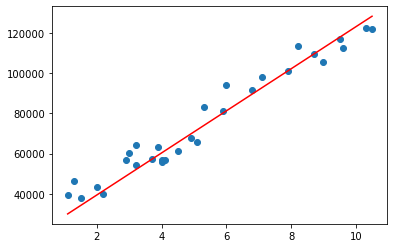

In [27]:
#show the result 
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(x,y_pred,c='r')
plt.show()


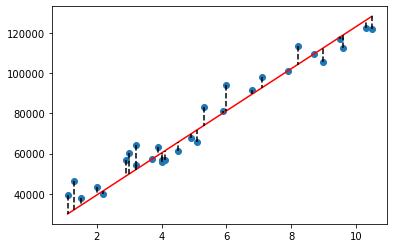

In [28]:
#show the result 
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(x,y_pred,c='r')
for i in range(len(x)):
  plt.plot([x[i],x[i]],[y[i],y_pred[i]],c='k',linestyle='--') 
plt.show()
plt.show()

In [29]:
#Conclution 
print(model.coef_)

[10472.84282761]


In [30]:
 # a 1 unit increase in Experience  is associated with an increase of 10472.84282761 Salary.